##About Practice Problem: HR Analytics
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

##1. Understand the Problem Statement & Import Packages and Datasets :

In [4]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import math
import gc
import os

# ML Libraries :
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,train_test_split,cross_val_score,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report
# Boosting Algorithms :
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Data Visualization Libraries :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px


In [80]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [81]:
train.head()

employee_id         department  ... avg_training_score is_promoted
0        65438  Sales & Marketing  ...                 49           0
1        65141         Operations  ...                 60           0
2         7513  Sales & Marketing  ...                 50           0
3         2542  Sales & Marketing  ...                 50           0
4        48945         Technology  ...                 73           0

[5 rows x 14 columns]

In [82]:
display(test.head())

employee_id         department  ... awards_won? avg_training_score
0         8724         Technology  ...           0                 77
1        74430                 HR  ...           0                 51
2        72255  Sales & Marketing  ...           0                 47
3        38562        Procurement  ...           0                 65
4        64486            Finance  ...           0                 61

[5 rows x 13 columns]

##2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
train.describe()

employee_id  no_of_trainings  ...  avg_training_score   is_promoted
count  54808.000000     54808.000000  ...        54808.000000  54808.000000
mean   39195.830627         1.253011  ...           63.386750      0.085170
std    22586.581449         0.609264  ...           13.371559      0.279137
min        1.000000         1.000000  ...           39.000000      0.000000
25%    19669.750000         1.000000  ...           51.000000      0.000000
50%    39225.500000         1.000000  ...           60.000000      0.000000
75%    58730.500000         1.000000  ...           76.000000      0.000000
max    78298.000000        10.000000  ...           99.000000      1.000000

[8 rows x 9 columns]

In [13]:
# unique values 

def unique_values(data):
    for column in data.columns :
        
        print("No. of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
        
unique_values(train)

No. of Unique Values in employee_id Column are : 54808
Actual Unique Values in employee_id Column are : [    1     2     4 ... 78296 78297 78298]

No. of Unique Values in department Column are : 9
Actual Unique Values in department Column are : ['Analytics' 'Finance' 'HR' 'Legal' 'Operations' 'Procurement' 'R&D'
 'Sales & Marketing' 'Technology']

No. of Unique Values in region Column are : 34
Actual Unique Values in region Column are : ['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']

No. of Unique Values in education Column are : 3
Actual Unique Values in education Column are : ["Bachelor's" 'Below Secondary' "Master's & above" nan]


In [14]:
unique_values(test)

No. of Unique Values in employee_id Column are : 23490
Actual Unique Values in employee_id Column are : [    3     6    11 ... 78284 78293 78295]

No. of Unique Values in department Column are : 9
Actual Unique Values in department Column are : ['Analytics' 'Finance' 'HR' 'Legal' 'Operations' 'Procurement' 'R&D'
 'Sales & Marketing' 'Technology']

No. of Unique Values in region Column are : 34
Actual Unique Values in region Column are : ['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']

No. of Unique Values in education Column are : 3
Actual Unique Values in education Column are : ["Bachelor's" 'Below Secondary' "Master's & above" nan]


In [15]:
train.corr()['is_promoted']

employee_id             0.001206
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.159320
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
Name: is_promoted, dtype: float64

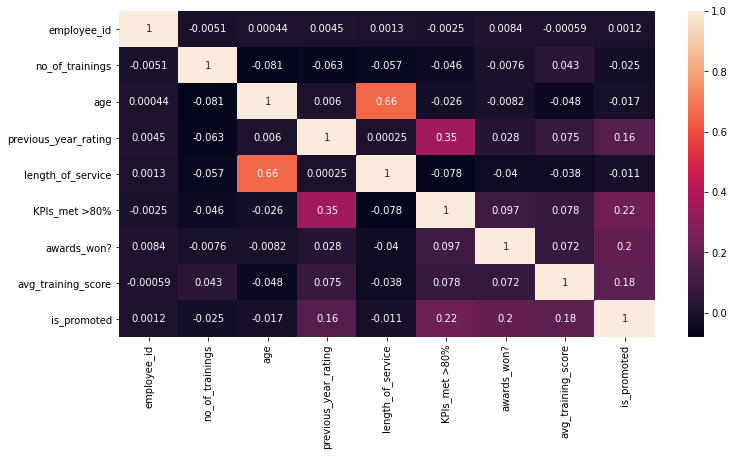

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True,fmt='.2g')
plt.show()

In [176]:
# Display How Each Feature is related to Target Variable in a Flow :
fig=px.parallel_categories(train[['department','education','gender','previous_year_rating','KPIs_met >80%',
                                    'recruitment_channel',
                                   'is_promoted']],
                           color='is_promoted',
                           color_continuous_scale=px.colors.sequential.Aggrnyl)
fig.show()



<Figure size 432x288 with 0 Axes>

## 3. Check for Duplicate Rows from Train Data if present : De-Duping

In [22]:
print(train.duplicated().sum())


0


In [23]:
print(test.duplicated().sum())


0


##4. Fill/Impute Missing Values :

In [11]:
train.isna().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

education and previous_year_rating contain null values


In [24]:
test.isna().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [25]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [30]:
temp=train[train.previous_year_rating.isna()]
temp['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

In [83]:
# Why is Data Missing in Column "previous_year_rating" ? 
# 1. Data was not entered Because those employees were Freshers (i.e) length_of_service = 1 
# 2. No Data would have been there in the Data Source itself for these employees.
# Logically we are imputing with "0" as Freshers with 1 Year Experince may not have previous_year_rating at all!

# Filling Missing Values in Train and Test :
train["previous_year_rating"] = train["previous_year_rating"].fillna(0)
test["previous_year_rating"] = test["previous_year_rating"].fillna(0)


In [144]:
train['is_Fresher']=train['previous_year_rating'].apply(lambda x: 1 if x==0 else 0)
test['is_Fresher']=test['previous_year_rating'].apply(lambda x: 1 if x==0 else 0)

In [85]:
display( train['is_Fresher'].value_counts())

0    50684
1     4124
Name: is_Fresher, dtype: int64

In [145]:
# Display Missing Values in Train and Test data :
display("Train : ", train.isnull().sum())
display("Test : ",test.isnull().sum())

'Train : '

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
is_Fresher              0
dtype: int64

'Test : '

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_Fresher              0
dtype: int64

In [87]:
train[train.education.isna()]

employee_id         department  ... is_promoted is_Fresher
10           29934         Technology  ...           0          1
21           33332         Operations  ...           0          0
32           35465  Sales & Marketing  ...           0          0
43           17423  Sales & Marketing  ...           0          0
82           66013  Sales & Marketing  ...           0          0
...            ...                ...  ...         ...        ...
54692        14821  Sales & Marketing  ...           0          0
54717         7684          Analytics  ...           0          0
54729         1797                 HR  ...           0          0
54742        38935  Sales & Marketing  ...           0          0
54806        13614  Sales & Marketing  ...           0          0

[2409 rows x 15 columns]

In [88]:
# Filling with Mode and New Category called "Others" are Most commonly Used Techniques which didn't work here.
# So we can assume that while Collecting Data Relevant Members Data were collected Close to one another.

train["education"] = train["education"].ffill(axis = 0)
train["education"] = train["education"].bfill(axis = 0)

test["education"] = test["education"].ffill(axis = 0)
test["education"] = test["education"].bfill(axis = 0)

In [146]:
# Display Missing Values in Train and Test data :
display("Train : ", train.isnull().sum())
display("Test : ",test.isnull().sum())

'Train : '

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
is_Fresher              0
dtype: int64

'Test : '

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_Fresher              0
dtype: int64

In [90]:
train.head()

employee_id         department  ... is_promoted is_Fresher
0        65438  Sales & Marketing  ...           0          0
1        65141         Operations  ...           0          0
2         7513  Sales & Marketing  ...           0          0
3         2542  Sales & Marketing  ...           0          0
4        48945         Technology  ...           0          0

[5 rows x 15 columns]

In [91]:
def count_plot(df,col,rotation=90):
  plt.figure(figsize=(16,10))
  sns.countplot(train[str(col)],order=(train[str(col)].value_counts().index))
  plt.ylabel('Count',fontsize=15)
  plt.xlabel('{}'.format(str(col)), fontsize =15)
  plt.title('{} distribution'.format(str(col)),fontsize=15)
  plt.xticks(rotation=rotation,fontsize=20)
  plt.show()


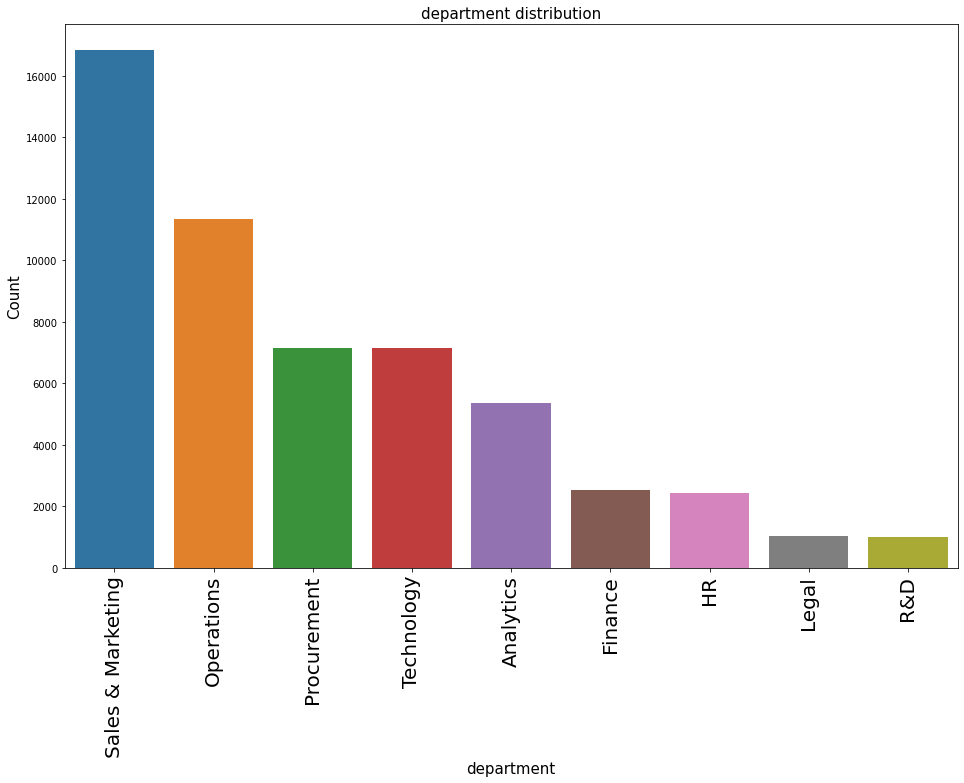

In [92]:
count_plot(train,'department')

most people work in Sales & Marketing department

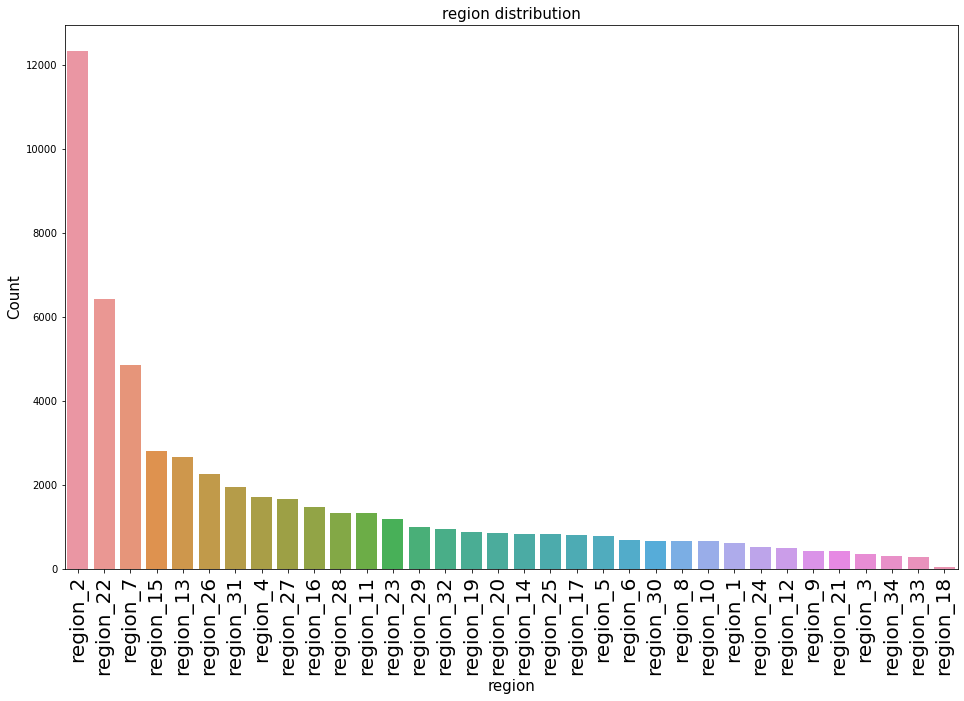

In [50]:
count_plot(train,'region')

most people work from region 2

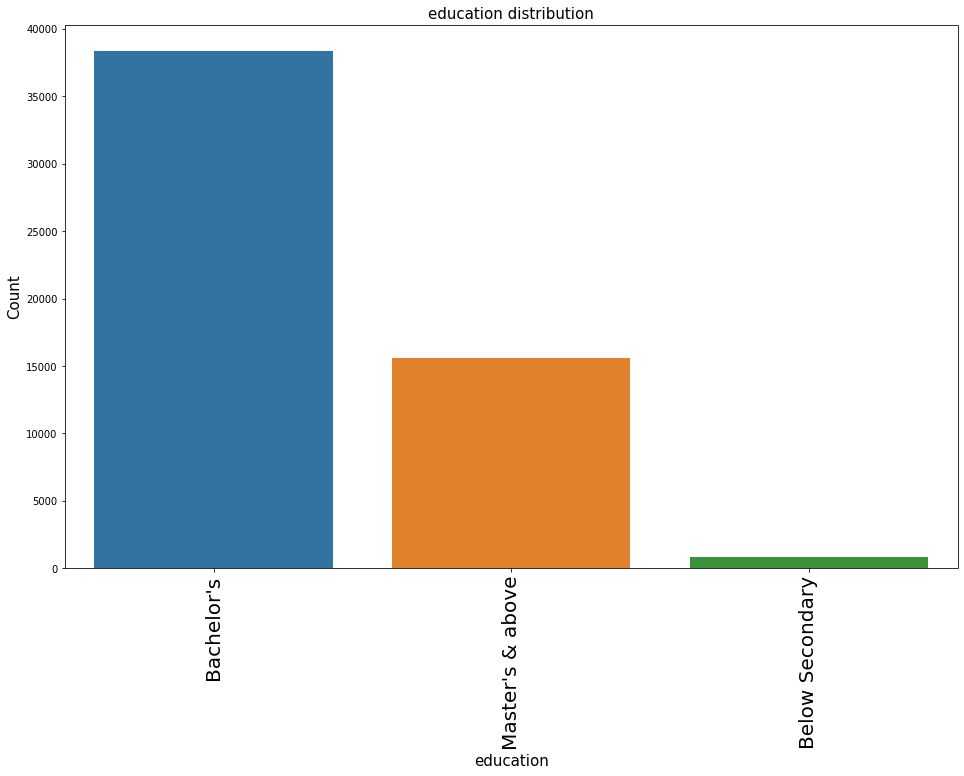

In [51]:
count_plot(train,'education')

Most people possess bachelors' degrees

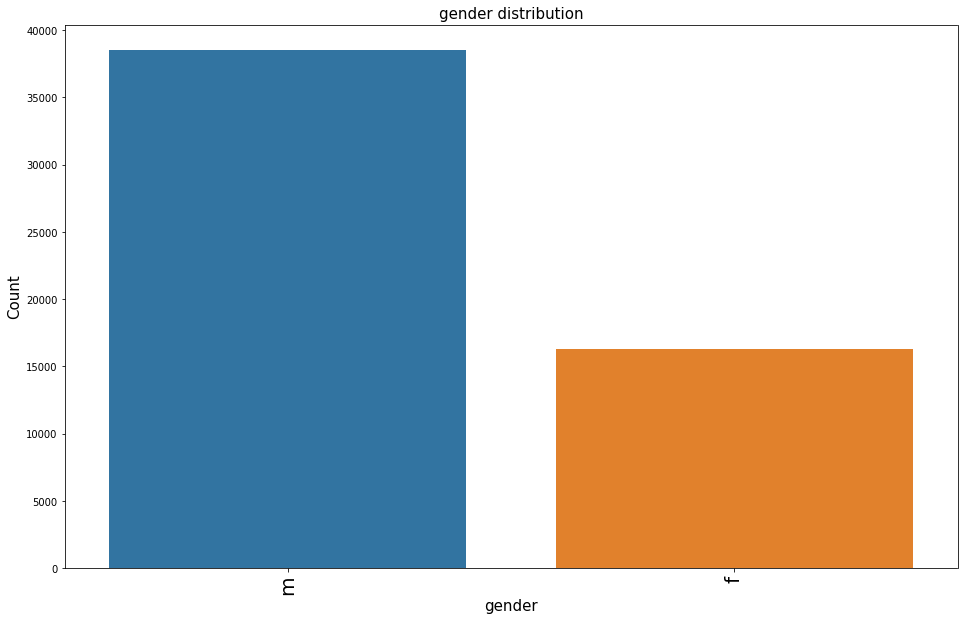

In [52]:
count_plot(train,'gender')

male employees are more than twice the female employees

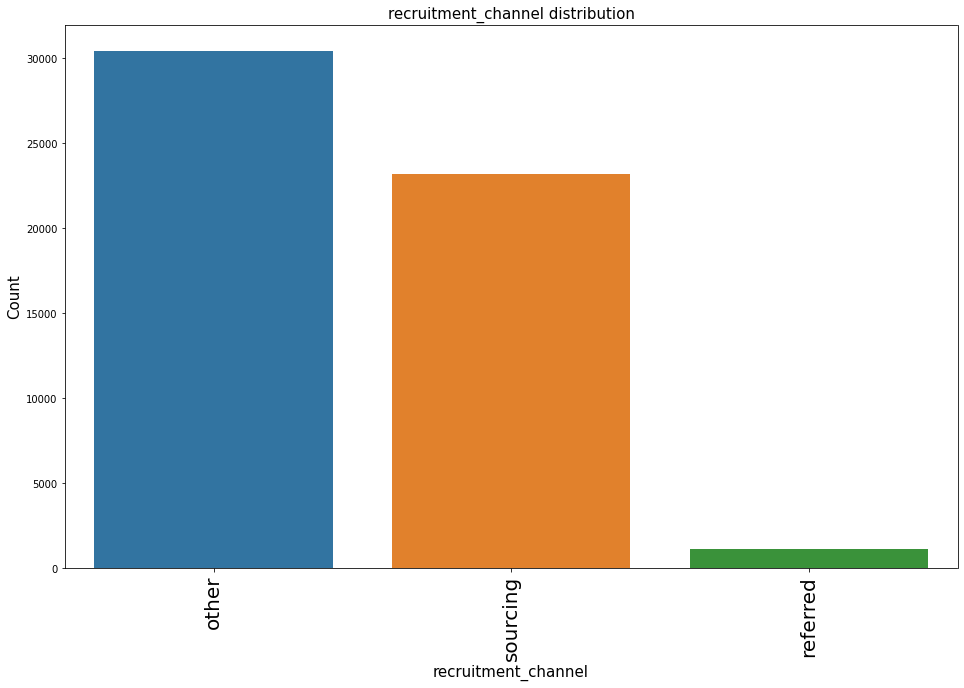

In [53]:
count_plot(train,'recruitment_channel')

most people are hired through other sources i.e, there are so many job portals nowadays

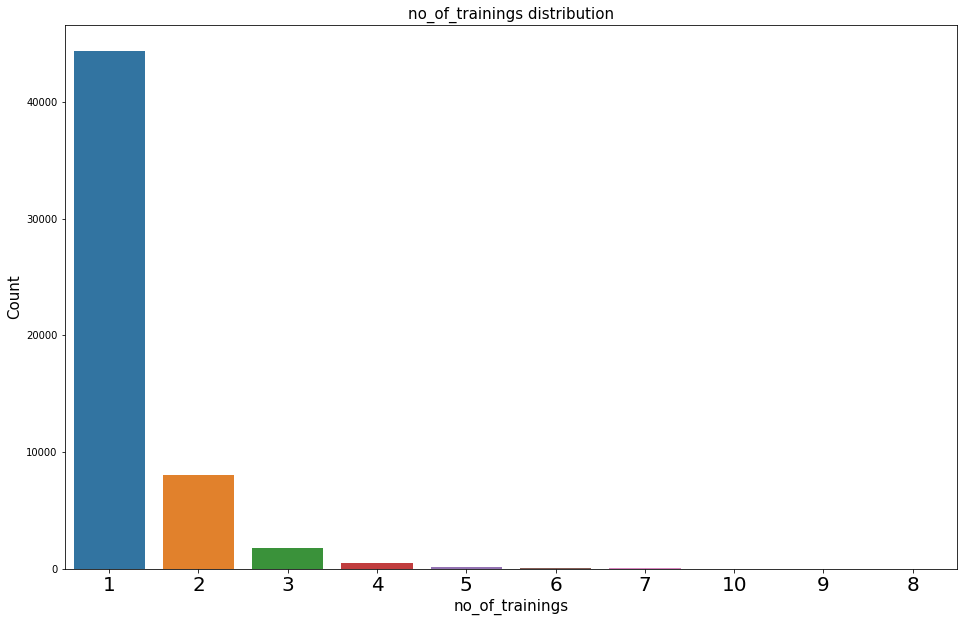

In [54]:
count_plot(train,'no_of_trainings',rotation=0)

most people have done 1 training only

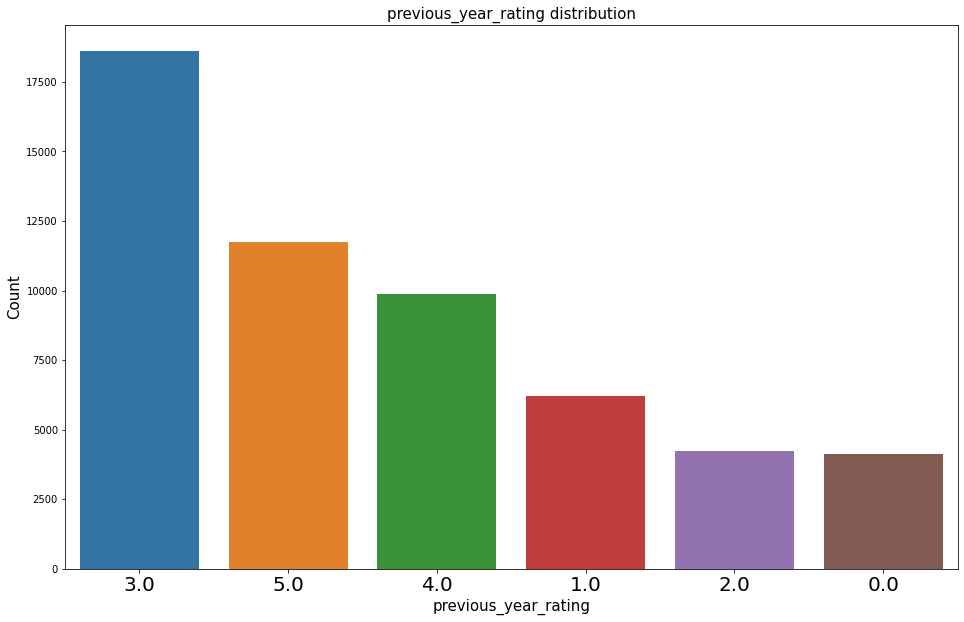

In [57]:
count_plot(train,'previous_year_rating',rotation=0)

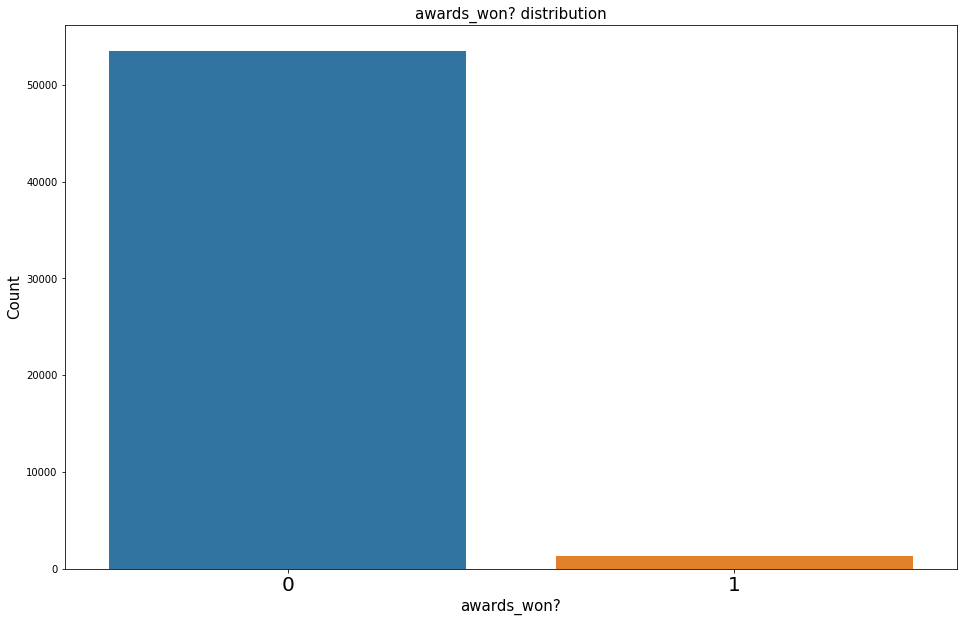

In [59]:
count_plot(train,'awards_won?',rotation=0)

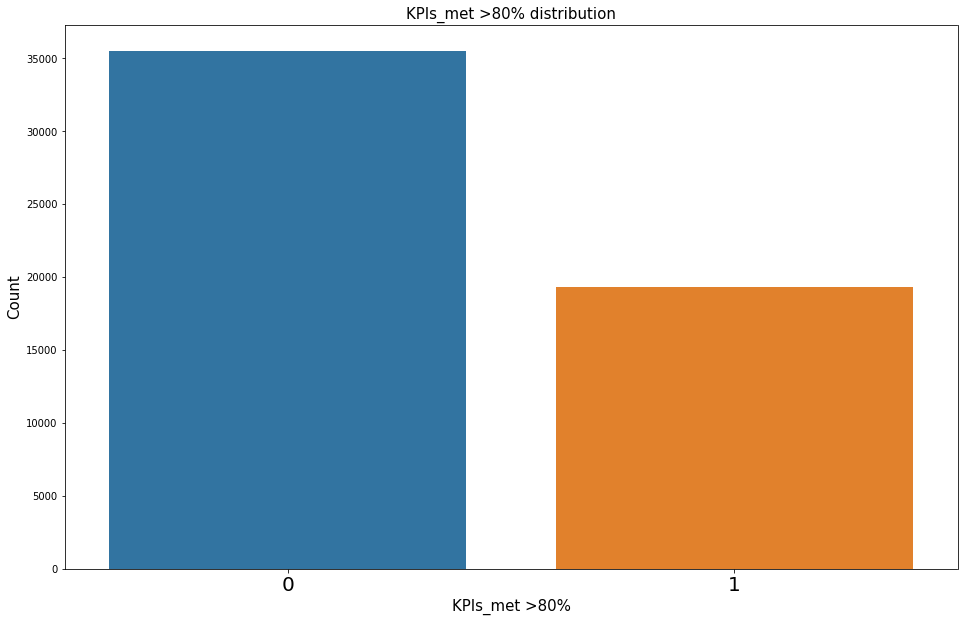

In [61]:
count_plot(train,'KPIs_met >80%',rotation=0)

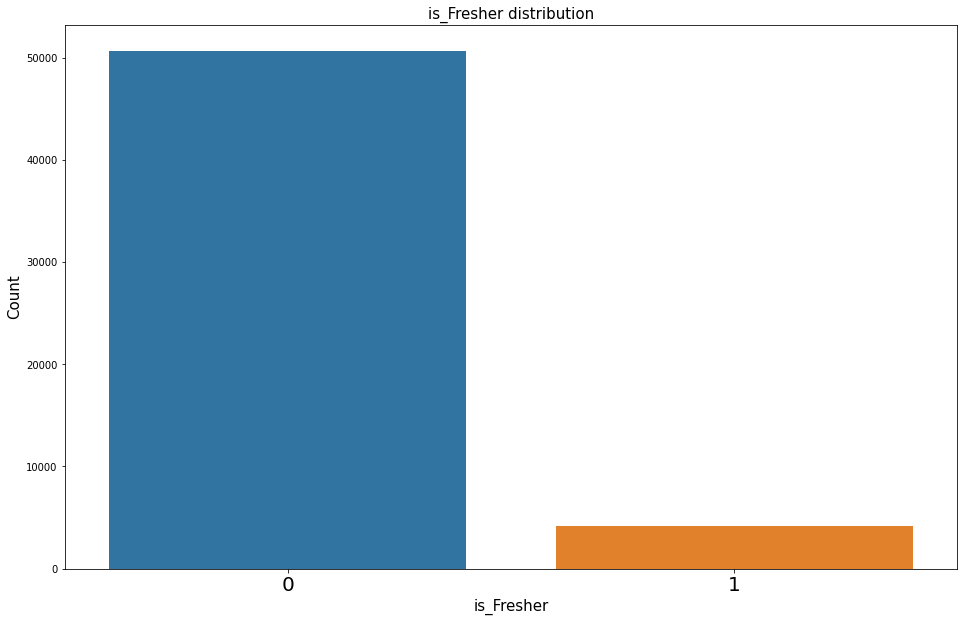

In [64]:
count_plot(train,'is_Fresher',rotation=0)

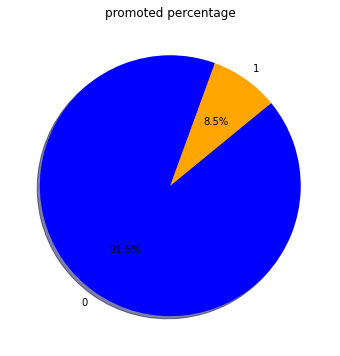

In [73]:
vc=train.is_promoted.value_counts()
vc.index
plt.figure(figsize=(10,6))
x=np.array(vc.index)
colors=['blue','orange']
y=(np.array(vc/vc.sum()))*100
plt.pie(y, labels=x, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=70)
plt.title("promoted percentage")
x=np.array(vc.index)
plt.show()

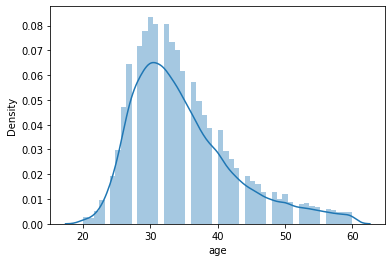

In [65]:
# displot -> plot a univariate(Single Feature) distribution of observations.

sns.distplot(train['age'])

train['age'] = pd.cut( x=train['age'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )
test['age']  = pd.cut( x=test['age'], bins=[20, 29, 39, 49],  labels=['20', '30', '40'] )

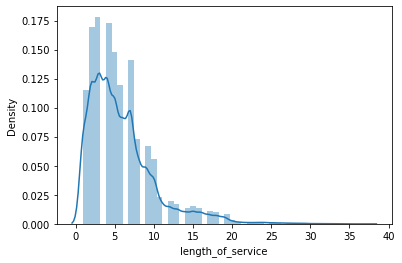

In [66]:
# displot -> plot a univariate(Single Feature) distribution of observations.

sns.distplot(train['length_of_service'])

train['length_of_service'] = pd.cut( x=train['length_of_service'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )
test['length_of_service']  = pd.cut( x=test['length_of_service'], bins=[20, 29, 39, 49],  labels=['20', '30', '40'] )

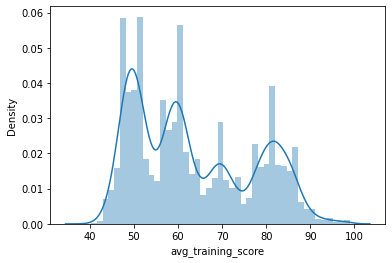

In [67]:
# displot -> plot a univariate(Single Feature) distribution of observations.

sns.distplot(train['avg_training_score'])

train['avg_training_score'] = pd.cut( x=train['avg_training_score'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )
test['avg_training_score']  = pd.cut( x=test['avg_training_score'], bins=[20, 29, 39, 49],  labels=['20', '30', '40'] )

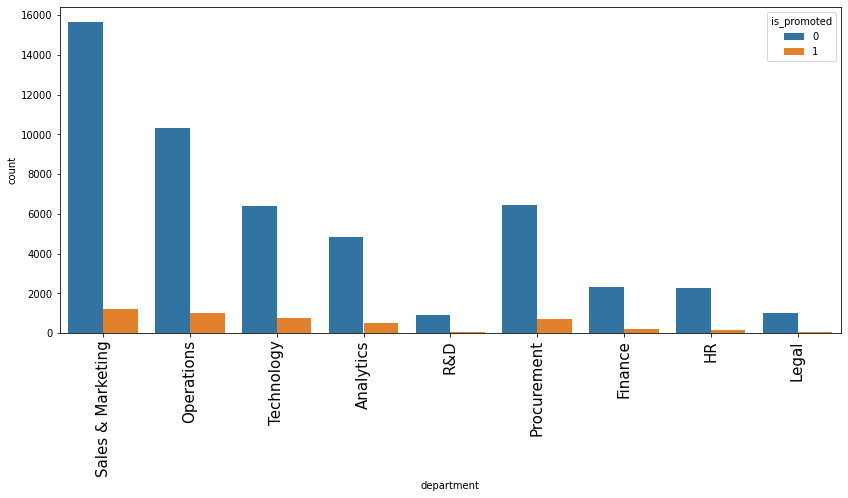

In [76]:
plt.figure(figsize=(14,6))
sns.countplot(x='department', hue='is_promoted', data=train)
plt.xticks(rotation=90,fontsize=15)
plt.show()

ratio of people promoted in technology and procurement is higher

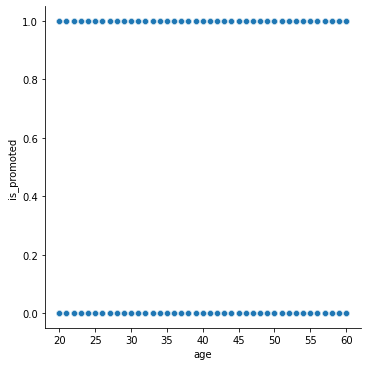

In [94]:
sns.relplot( x='age',y='is_promoted',data=train)
plt.show()

In [97]:
pd.crosstab(index=train['recruitment_channel'],columns='count')


col_0                count
recruitment_channel       
other                30446
referred              1142
sourcing             23220

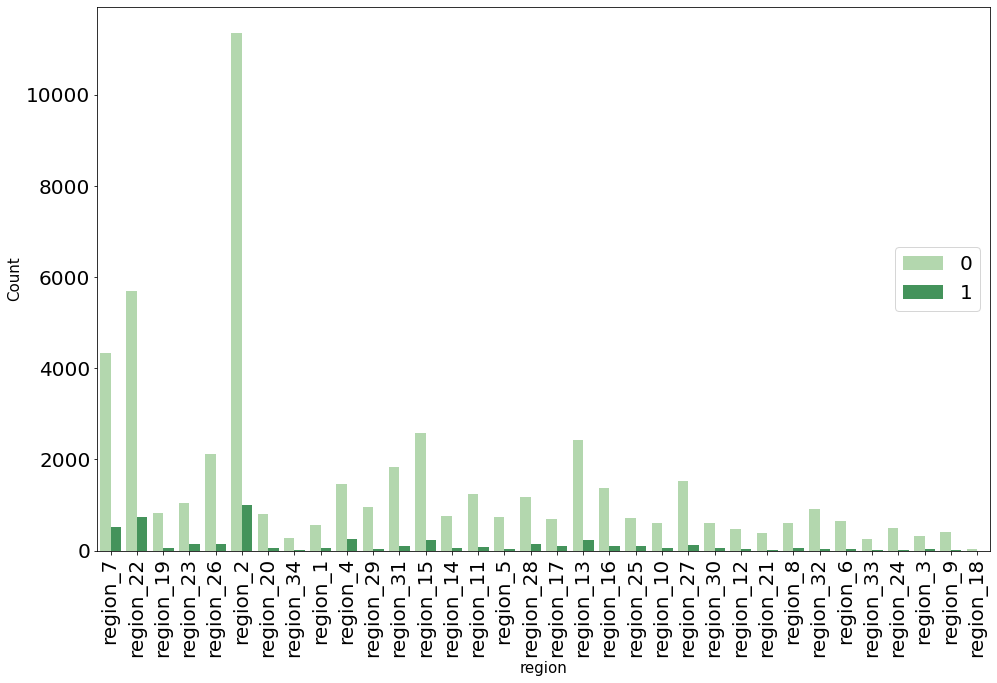

In [98]:
plt.figure(figsize=(16,10))
sns.countplot(x='region',hue='is_promoted',data=train,palette='Greens')
plt.xlabel('region',fontsize = 15)
plt.legend(loc=5,fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()



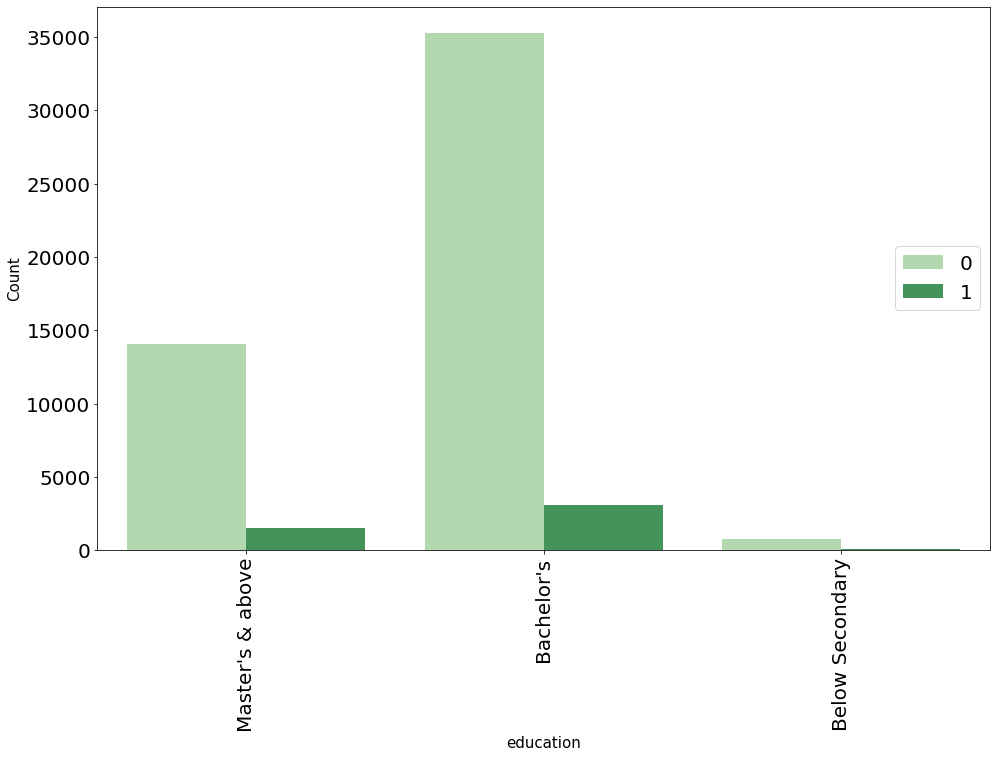

In [99]:
plt.figure(figsize=(16,10))
sns.countplot(x='education',hue='is_promoted',data=train,palette='Greens')
plt.xlabel('education',fontsize = 15)
plt.legend(loc=5,fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()



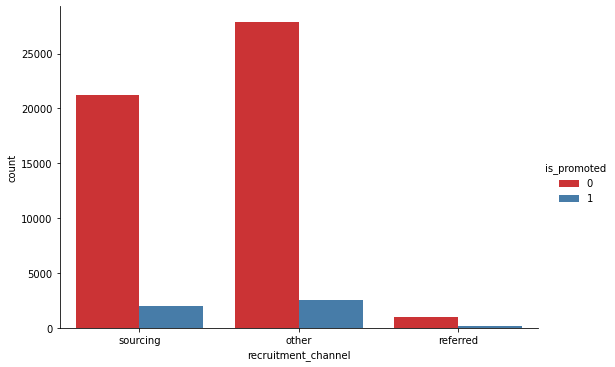

In [101]:
sns.catplot(hue='is_promoted',x='recruitment_channel',data=train,kind='count',aspect=1.5, palette="Set1")

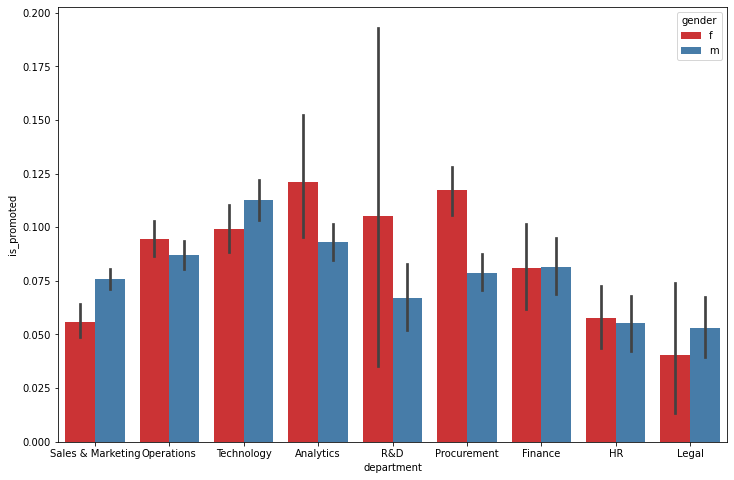

In [102]:
plt.figure(figsize=[12,8])
sns.barplot(x='department',y='is_promoted',hue='gender',data=train, palette="Set1")

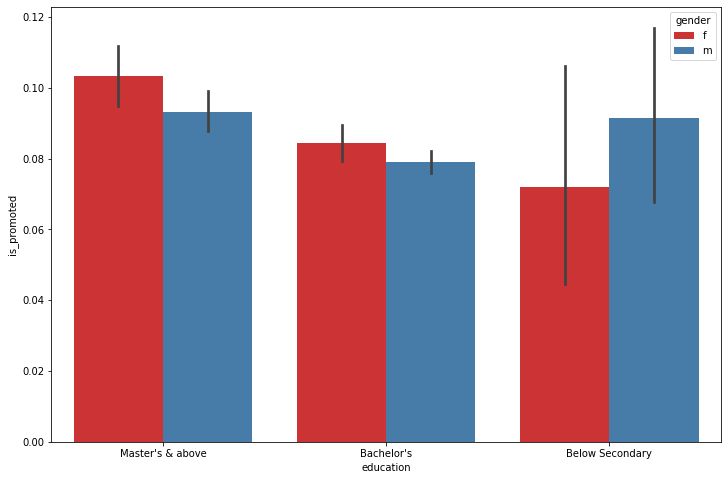

In [103]:
plt.figure(figsize=[12,8])
sns.barplot(x='education',y='is_promoted',hue='gender',data=train, palette="Set1")

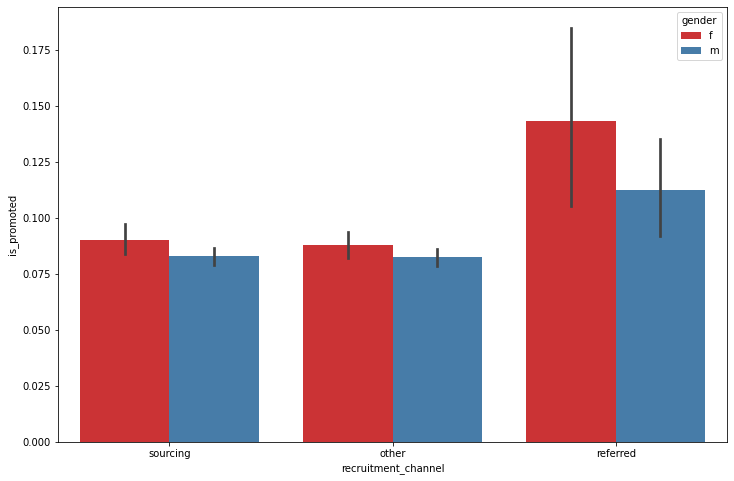

In [104]:
plt.figure(figsize=[12,8])
sns.barplot(x='recruitment_channel',y='is_promoted',hue='gender',data=train, palette="Set1")

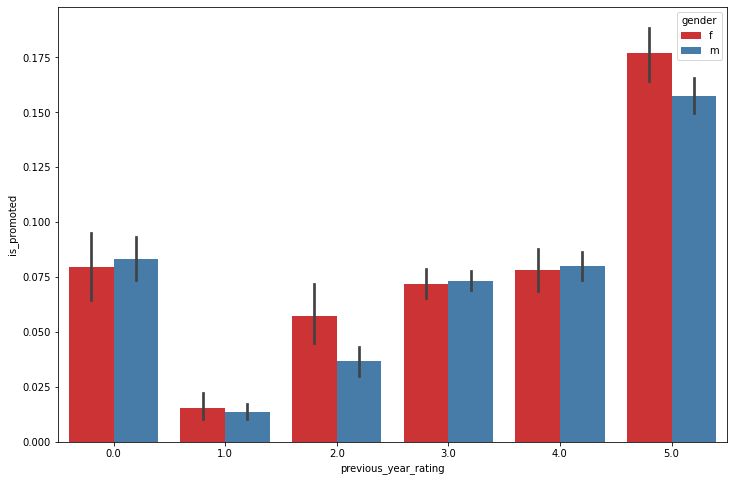

In [105]:
plt.figure(figsize=[12,8])
sns.barplot(x='previous_year_rating',y='is_promoted',hue='gender',data=train, palette="Set1")

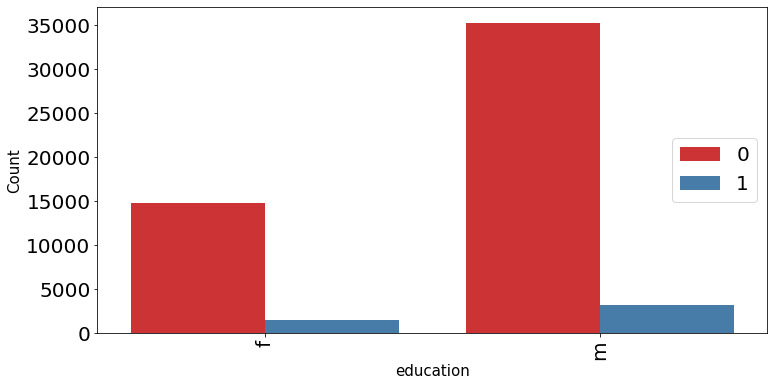

In [108]:
plt.figure(figsize=(12,6))
sns.countplot(x='gender',hue='is_promoted',data=train,palette='Set1')
plt.xlabel('education',fontsize = 15)
plt.legend(loc=5,fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()



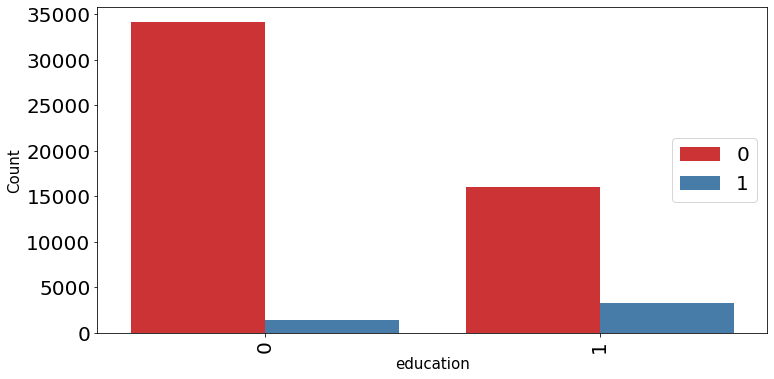

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(x='KPIs_met >80%',hue='is_promoted',data=train,palette='Set1')
plt.xlabel('education',fontsize = 15)
plt.legend(loc=5,fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()



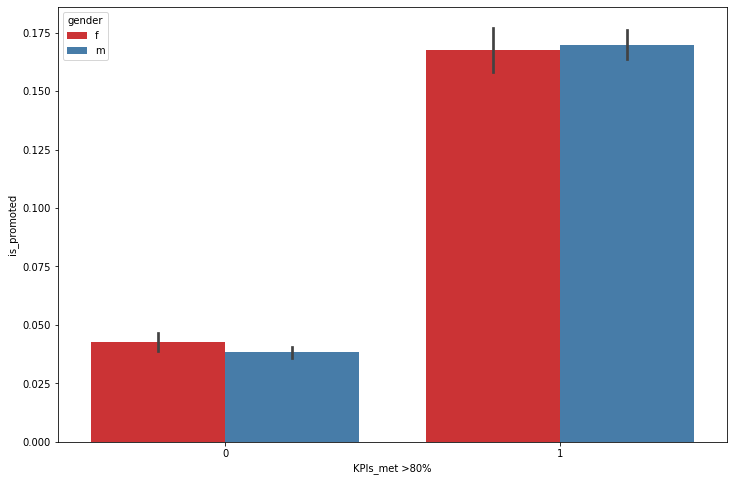

In [110]:
plt.figure(figsize=[12,8])
sns.barplot(x='KPIs_met >80%',y='is_promoted',hue='gender',data=train, palette="Set1")

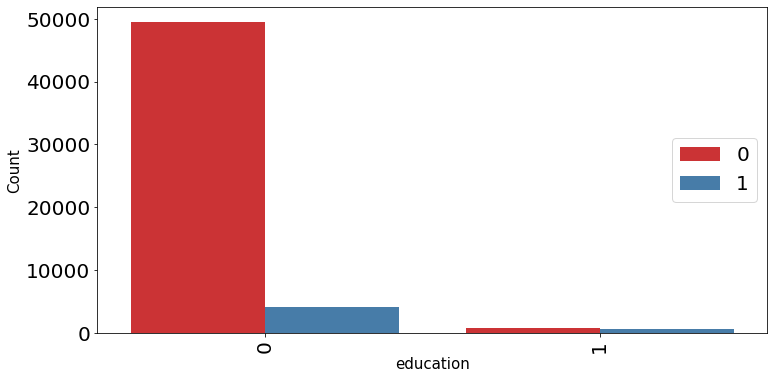

In [111]:
plt.figure(figsize=(12,6))
sns.countplot(x='awards_won?',hue='is_promoted',data=train,palette='Set1')
plt.xlabel('education',fontsize = 15)
plt.legend(loc=5,fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()



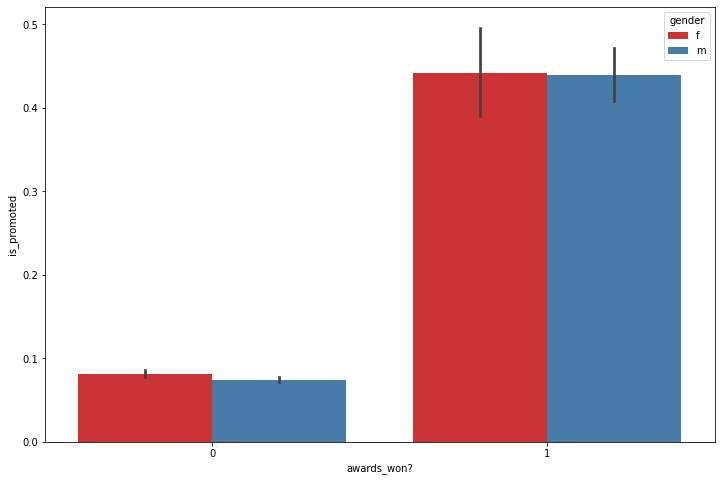

In [112]:
plt.figure(figsize=[12,8])
sns.barplot(x='awards_won?',y='is_promoted',hue='gender',data=train, palette="Set1")

## 5. Feature Engineering :


In [113]:
train.head(3)

employee_id         department  ... is_promoted is_Fresher
0        65438  Sales & Marketing  ...           0          0
1        65141         Operations  ...           0          0
2         7513  Sales & Marketing  ...           0          0

[3 rows x 15 columns]

In [118]:
train.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

##6. Split Train Data into Predictors(Independent) & Target(Dependent) :

In [147]:
X_train=train.drop('is_promoted',axis=1)
y_train=train['is_promoted']

X_test=test

##7.1 Data Encoding : Label Encoding, OneHot Encoding :

In [148]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
       
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
        encoding_data = pd.get_dummies(encoding_data)
        
    dtypes_list =['float64','float32','int64','int32']
    encoding_data.astype( dtypes_list[0] ).dtypes
    
    return encoding_data

In [149]:
encoding_columns  = [ "region", "age","department", "education", "gender", "recruitment_channel" ]
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"]

In [150]:
X_train_encode = data_encoding( encoding_strategy[1] , X_train , encoding_columns )
X_test_encode =  data_encoding( encoding_strategy[1] , X_test  , encoding_columns )

In [151]:
display(X_train_encode.head())

employee_id  ...  recruitment_channel_sourcing
0        65438  ...                             1
1        65141  ...                             0
2         7513  ...                             1
3         2542  ...                             0
4        48945  ...                             0

[5 rows x 60 columns]

In [152]:
display(X_test_encode.head())

employee_id  ...  recruitment_channel_sourcing
0         8724  ...                             1
1        74430  ...                             0
2        72255  ...                             0
3        38562  ...                             0
4        64486  ...                             1

[5 rows x 60 columns]

##7.2 Data Scaling : StandardScaler, MinMaxScaler 

In [158]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):

    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    else:
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])

    
    return scaling_data

In [159]:
# RobustScaler is better in handling Outliers :

# QUOTED FOR DOCUMENTATION : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaling_strategy = ["StandardScaler","MinMaxScaler"]
X_train_scale = data_scaling( scaling_strategy[0] , X_train_encode , X_train_encode.columns )
X_test_scale  = data_scaling( scaling_strategy [0] , X_test_encode  , X_test_encode.columns )

# Display Scaled Train and Test Features :

display(X_train_scale.head())
display(X_train_scale.head())

employee_id  ...  recruitment_channel_sourcing
0     1.161858  ...                      1.166353
1     1.148709  ...                     -0.857373
2    -1.402741  ...                      1.166353
3    -1.622829  ...                     -0.857373
4     0.431639  ...                     -0.857373

[5 rows x 60 columns]

employee_id  ...  recruitment_channel_sourcing
0     1.161858  ...                      1.166353
1     1.148709  ...                     -0.857373
2    -1.402741  ...                      1.166353
3    -1.622829  ...                     -0.857373
4     0.431639  ...                     -0.857373

[5 rows x 60 columns]

##8. Create Baseline ML Model for Binary Classification Problem :

In [167]:
# Create a Dictionary (Key->Value Pairs) for "ML Model Name"-> "ML Model Functions with Hyper-Parameters" :

Classifiers = {'XGBoost' : XGBClassifier(learning_rate =0.10, 
                                           n_estimators=500, 
                                           max_depth=5, 
                                           subsample = 0.8, 
                                           verbosity = 1,
                                           scale_pos_weight = 2.1,
                                           updater ="grow_histmaker",
                                           base_score  = 0.25),
                            
               'CatBoost' : CatBoostClassifier(learning_rate=0.20, 
                                                 n_estimators=500, 
                                                 subsample=0.0015, 
                                            
                                                 max_depth=5, 
                                                 scale_pos_weight=2.1),
               
               'LightGBM' : LGBMClassifier(subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = 1, 
                                             max_bin = 60,
                                             num_leaves = 400,
                                             boosting_type = 'dart',
                                             learning_rate=0.20, 
                                             n_estimators=500,
                                             max_depth=5, 
                                             scale_pos_weight=2.1)
 }



##9. Improve ML Model with Voting Classifier with MODEL Evaluation METRIC - "F1" and Predict Target "is_promoted" :

In [168]:
voting=VotingClassifier(estimators=Classifiers.items(),voting='soft',weights=[4,4,4.1])

In [169]:
voting.fit(X_train_scale,y_train)

[13:57:54] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
0:	learn: 0.5686130	total: 20.9ms	remaining: 10.4s
1:	learn: 0.5130981	total: 40.8ms	remaining: 10.2s
2:	learn: 0.4577112	total: 58.4ms	remaining: 9.67s
3:	learn: 0.4266816	total: 78.8ms	remaining: 9.77s
4:	learn: 0.4089870	total: 98.7ms	remaining: 9.77s
5:	learn: 0.3938954	total: 120ms	remaining: 9.86s
6:	learn: 0.3869442	total: 140ms	remaining: 9.87s
7:	learn: 0.3818155	total: 161ms	remaining: 9.87s
8:	learn: 0.3752306	total: 181ms	remaining: 9.9s
9:	learn: 0.3663505	total: 201ms	remaining: 9.86s
10:	learn: 0.3646810	total: 231ms	remaining: 10.3s
11:	learn: 0.3617595	total: 255ms	remaining: 10.4s
12:	learn: 0.3579610	total: 277ms	remaining: 10.4s
13:	learn: 0.3562899	total: 297ms	remaining: 10.3s


VotingClassifier(estimators=dict_items([('XGBoost', XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1,...
               max_depth=5, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=400,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, scale_pos_weight=2.1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=2, verbosity=1))]),
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=[4, 4, 4.1])

In [170]:
voting_pred=voting.predict_proba(X_test_scale)[::,1]

#10. Result Submission, Check Leaderboard & Improve "F1" Score :

In [171]:
# Round off the Probability Results :
predictions = [int(round(value)) for value in voting_pred]

# Create a Dataframe Table for Submission Purpose :
final = pd.DataFrame({'employee_id': test["employee_id"], 'is_promoted' : predictions})
final.to_csv('submission_HR_Analytics.csv',index=False)